## Goals
 - Short introduction Jupyter Notebook
 - End-to-end Machine Learning case
 - Data Science steps
 - 2 minutes Pandas introduction
 - Scikit-learn introduction 
 - Natural Language Processing
 

## Introduction Jupyter Notebook
- Pros - Cons
- When is it suitable?

In [1]:
a = 2
b = 3
a+b

5

Run bash commands from notebook

In [2]:
#!pip install -r requirements.txt

Import necessary modules

In [3]:
import pandas as pd
import time
import datetime as dt
import numpy as np
import requests
import urllib3
import json 
import random 
from tqdm import tqdm
import pickle 
import string
import codecs
from nltk.stem.porter import PorterStemmer
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from collections import defaultdict

sns.set()

%matplotlib inline

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

LOAD = True
SAVE = False
TRAIN = True

## Data science step 1: Data collection

Get all courses at NTNU

In [4]:
if LOAD:
    res_json = pickle.load(open("course_desc.dict", "rb"))
else:
    res = requests.get("http://www.ime.ntnu.no/api/course/-")
    res_json = json.loads(res.text)
    pickle.dump(res_json, open("course_desc.dict", "wb"))

In [5]:
len(res_json["course"])

5586

In [6]:
res_json["course"][0]

{'code': 'MA3402',
 'name': 'Analyse på mangfoldigheter',
 'norwegianName': 'Analyse på mangfoldigheter',
 'newNorwegianName': 'Analyse på mangfoldigheter',
 'englishName': 'Analysis on Manifolds',
 'versionCode': '1'}

In [7]:
random.choice(res_json["course"])

{'code': 'TEK2031',
 'name': 'Teknologiledelse',
 'norwegianName': 'Teknologiledelse',
 'englishName': 'Introduction to Operations management',
 'versionCode': '1'}

In [8]:
def get_grades(emne):
    try:
        res = requests.get("https://grades.no/api/courses/{}/grades.json".format(emne))
        grades = json.loads(res.text)
    except Exception as e:
        print(e)
        grades = {}
    return grades

In [9]:
get_grades("TDT4173")

[{'semester_code': 'H2008',
  'average_grade': 3.533333333333333,
  'passed': 0,
  'a': 7,
  'b': 1,
  'c': 3,
  'd': 2,
  'e': 1,
  'f': 1},
 {'semester_code': 'H2009',
  'average_grade': 3.03125,
  'passed': 0,
  'a': 7,
  'b': 6,
  'c': 11,
  'd': 2,
  'e': 1,
  'f': 5},
 {'semester_code': 'H2010',
  'average_grade': 3.230769230769231,
  'passed': 0,
  'a': 6,
  'b': 6,
  'c': 8,
  'd': 3,
  'e': 0,
  'f': 3},
 {'semester_code': 'H2011',
  'average_grade': 2.576923076923077,
  'passed': 0,
  'a': 2,
  'b': 5,
  'c': 9,
  'd': 3,
  'e': 4,
  'f': 3},
 {'semester_code': 'H2012',
  'average_grade': 2.657142857142857,
  'passed': 0,
  'a': 3,
  'b': 17,
  'c': 26,
  'd': 9,
  'e': 7,
  'f': 8},
 {'semester_code': 'H2013',
  'average_grade': 2.9565217391304346,
  'passed': 0,
  'a': 9,
  'b': 14,
  'c': 8,
  'd': 4,
  'e': 3,
  'f': 8},
 {'semester_code': 'H2014',
  'average_grade': 2.7666666666666666,
  'passed': 0,
  'a': 12,
  'b': 14,
  'c': 9,
  'd': 7,
  'e': 9,
  'f': 9},
 {'semes

In [10]:
if LOAD:
    grades = pickle.load(open("grades.dict", "rb"))
else:
    grades = {}
    for course in tqdm(res_json["course"]):
        grades[course["code"]] = get_grades(course["code"])
    pickle.dump(grades, open("grades.dict", "wb"))

## 2 minute introduction to Pandas
 - What is pandas?
 - Most common things you can do with it

In [11]:
df = pd.DataFrame(res_json["course"])

In [12]:
df.head()

,code,englishName,name,newNorwegianName,norwegianName,versionCode
0,MA3402,Analysis on Manifolds,Analyse på mangfoldigheter,Analyse på mangfoldigheter,Analyse på mangfoldigheter,1
1,MUSP4145,Chamber Music B,Kammermusikk B,Kammermusikk B,Kammermusikk B,1
2,MUSP4136,Accompaniment A,Akkompagnering A,Akkompagnering A,Akkompagnering A,1
3,MUSP4137,Secondary Instrument 1,Biinstrument 1,Biinstrument 1,Biinstrument 1,1
4,BA8304,Soil Modelling,Jordmodellering,Jordmodellering,Jordmodellering,1


In [13]:
def get_desc(emne):
    try:
        res = requests.get("http://www.ime.ntnu.no/api/course/en/{}".format(emne)) 
        desc = json.loads(res.text)
    except Exception as e:
        print(e)
        desc = {}
    return desc

In [14]:
get_desc("TDT4171")

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [15]:
if LOAD: 
    info = pickle.load(open("info_english.dict", "rb"))
else:
    info = {}
    for course in tqdm(res_json["course"]):
        info[course["code"]] = get_desc(course["code"])
    pickle.dump(info, open("info_english.dict", "wb"))

In [16]:
info["TDT4171"]

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [17]:
doc = {}
for course in tqdm(res_json["course"]):
    if "infoType" in info[course["code"]]["course"].keys():
        #print(info[course["code"]]["course"]["infoType"])
        text = []
        for x in info[course["code"]]["course"]["infoType"]:
            if x["code"] in ["INNHOLD", "KURSMAT", "MÅL"]:
                try:
                    text.append(x["text"])
                except KeyError:
                    pass
                doc[course["code"]] = "".join(text)

100%|██████████| 5586/5586 [00:00<00:00, 199500.87it/s]


In [18]:
res = requests.get("http://www.ime.ntnu.no/api/org/-") 
org = json.loads(res.text)
org

{'orgUnit': [{'orgUnitId': 1,
   'category': 'Organisasjon',
   'acronym': 'NTNU',
   'name': 'Norges teknisk-naturvitenskapelige universitet',
   'description': 'Norges teknisk- naturvitenskapelige universitet',
   'email': 'postmottak@ntnu.no',
   'url': 'https://www.ntnu.no',
   'validFrom': '1996-01-01',
   'subUnit': [{'orgUnitId': 760,
     'category': ' ',
     'acronym': 'RE',
     'name': 'Rektor',
     'parentId': 1,
     'email': 'postmottak@ntnu.no',
     'url': 'https://www.ntnu.no/rektor',
     'validFrom': '2007-01-01',
     'subUnit': [{'orgUnitId': 1042,
       'category': 'Stab',
       'acronym': 'FO',
       'name': 'Prorektor for forskning',
       'parentId': 760,
       'email': 'postmottak@ntnu.no',
       'url': 'https://www.ntnu.no/prorektor-forskning',
       'validFrom': '2009-08-01',
       'subUnit': [{'orgUnitId': 1044,
         'category': 'Stab',
         'acronym': 'FO-STAB',
         'name': 'Prorektor forskning',
         'parentId': 1042,
         '

In [19]:
def get_subunits(unit, level):
    global orgid_to_fac
    level+=1
    if "subUnit" in unit.keys():
        for subunit in unit["subUnit"]:
            print("\t"*level+subunit["acronym"])
            print("\t"*level+subunit["name"])
            print("\t"*level+str(subunit["orgUnitId"]))
            orgid_to_fac[subunit["orgUnitId"]] = unit["acronym"]
            orgid_to_inst[subunit["orgUnitId"]] = subunit["acronym"]
        return get_subunits(subunit, level)
    else:
        return False

In [20]:
level = 0
orgid_to_fac = defaultdict(str)
orgid_to_inst = defaultdict(str)
for unit in org["orgUnit"][0]["subUnit"][0]["subUnit"]:
    print(unit["acronym"])
    print(unit["name"])
    get_subunits(unit, level)

FO
Prorektor for forskning
	FO-STAB
	Prorektor forskning
	1044
NY
Prorektor for nyskaping
	NY-STAB
	Prorektor nyskaping
	1045
UTD
Prorektor for utdanning
	UTD-STAB
	Prorektor utdanning
	765
	UTD-ST
	Avdeling for studenttjenester
	1201
	UTD-SA
	Avdeling for studieadministrasjon
	1200
	UTD-UK
	Avdeling for utdanningskvalitet
	767
	UTD-UB
	NTNU Universitetsbiblioteket
	774
		UTD-UB-ADM
		Bibliotekadministrasjonen
		1050
		UTD-UB-SANT
		Bibliotekseksjon for arkitektur, naturvitenskap, teknologi og økonomi
		1051
		UTD-UB-HUMSAM
		Bibliotekseksjon for humaniora, samfunns- og utdanningsvitenskap
		1023
		UTD-UB-SKV
		Bibliotekseksjon for kultur- og vitenskapshistorie
		1024
		UTD-UB-MH
		Bibliotekseksjon for medisin og helsevitenskap
		1048
		UTD-UB-SD
		Bibliotekseksjon for samlinger og digitale tjenester
		1046
		UTD-UB-GJO
		Bibliotekseksjon i Gjøvik
		1096
		UTD-UB-ALS
		Bibliotekseksjon i Ålesund
		1115
RE-REK
Rektor og styre
HF
Det humanistiske fakultet
	HF-ADM
	HF fakultetsadministras

In [21]:
def get_fac_from_ouid(ouid):
    try:
        r = requests.get("http://www.ime.ntnu.no/api/org/{}".format(ouid)) 
        o = json.loads(r.text)
        fac = o["orgUnitDetailed"]["acronym"]
    except Exception as e:
        print(e)
        fac = None
    return fac

In [22]:
orgid_to_fac

defaultdict(str,
            {1044: 'FO',
             1045: 'NY',
             765: 'UTD',
             1201: 'UTD',
             1200: 'UTD',
             767: 'UTD',
             774: 'UTD',
             1050: 'UTD-UB',
             1051: 'UTD-UB',
             1023: 'UTD-UB',
             1024: 'UTD-UB',
             1048: 'UTD-UB',
             1046: 'UTD-UB',
             1096: 'UTD-UB',
             1115: 'UTD-UB',
             815: 'HF',
             1082: 'HF',
             1081: 'HF',
             821: 'HF',
             823: 'HF',
             1080: 'HF',
             822: 'HF',
             808: 'AD',
             1213: 'AD',
             1214: 'AD',
             840: 'AD',
             813: 'AD',
             826: 'IE',
             1163: 'IE',
             827: 'IE',
             832: 'IE',
             829: 'IE',
             1215: 'IE',
             831: 'IE',
             828: 'IE',
             830: 'IE',
             835: 'IV',
             1076: 'IV',
             1

In [23]:
orgid_to_inst

defaultdict(str,
            {1044: 'FO-STAB',
             1045: 'NY-STAB',
             765: 'UTD-STAB',
             1201: 'UTD-ST',
             1200: 'UTD-SA',
             767: 'UTD-UK',
             774: 'UTD-UB',
             1050: 'UTD-UB-ADM',
             1051: 'UTD-UB-SANT',
             1023: 'UTD-UB-HUMSAM',
             1024: 'UTD-UB-SKV',
             1048: 'UTD-UB-MH',
             1046: 'UTD-UB-SD',
             1096: 'UTD-UB-GJO',
             1115: 'UTD-UB-ALS',
             815: 'HF-ADM',
             1082: 'HF-IFR',
             1081: 'HF-IHS',
             821: 'HF-IKM',
             823: 'HF-IMU',
             1080: 'HF-ISL',
             822: 'HF-KULT',
             808: 'AD-ADM',
             1213: 'AD-IAP',
             1214: 'AD-IAT',
             840: 'AD-ID',
             813: 'AD-KIT',
             826: 'IE-ADM',
             1163: 'IE-IAL',
             827: 'IE-IDI',
             832: 'IE-IES',
             829: 'IE-IEL',
             1215: 'IE-IIR',
  

Create pandas DataFrame from the dictionary

In [24]:
doc_df = pd.DataFrame.from_dict(doc, orient="index", columns=["description"])

In [25]:
doc_df.head()

,description
MA3402,The course deals with fundamental concepts fro...
MUSP4145,This subject includes chambermusic- repertoire...
MUSP4136,The course includes accompaniment and ensemble...
MUSP4137,Individual lectures and independent work on th...
BA8304,"The course is given every second year, next ti..."


In [26]:
doc_df.sample(5)

,description
LGU13004,
PSYPRO4118,This course will try to give an introduction i...
SØK3950,The Master thesis topic is individually select...
TYSK2301,The course's emphasis is on conveying a pictur...
MCT4044,The aim of the course is to develop knowledge ...


## Data science step 2: Data cleaning/preprocessing/wrangling

Add column with description-length for each course

In [27]:
doc_df["length"] = doc_df.description.apply(lambda x: len(x))

In [28]:
doc_df.sample(5)

,description,length
FIN3900,The Department of Economics approves the topic...,486
TBA5100,Theoretical background for the calculation met...,1764
ELE3391,The topics are chosen based on the given probl...,966
IFUD1004,,0
TALM3005,,0


In [29]:
doc_df["emne"] = doc_df.index.values

In [30]:
doc_df["ouid"] = doc_df.emne.apply(lambda emne: info[emne]["course"]["ouId"])

In [31]:
doc_df["fac"] = doc_df.ouid.map(lambda orgid: orgid_to_fac[orgid])

In [32]:
doc_df["inst"] = doc_df.ouid.map(lambda orgid: orgid_to_inst[orgid])

In [33]:
rest = doc_df[doc_df.fac.apply(lambda x: len(x)==0)].ouid.map(get_fac_from_ouid)
rest

MD4072       MH
NRS8004      MH
NRS8002      MH
AAR4805      AD
AAR4600      AD
MD4030       MH
MD4061       MH
SPRÅK8895    HF
ESTET8881    HF
AAR4918      AD
ARK8871      HF
SPRÅK8861    HF
SPRÅK8865    HF
SPRÅK8877    HF
RVI8871      HF
MD4051       MH
IFEL8000     IV
ESTET8863    HF
HMS0002      IE
NRS8003      MH
ØK8000       OK
SPRÅK8868    HF
ESTET8880    HF
AAR4906      AD
SPRÅK8863    HF
SPRÅK8882    HF
MD3004       MH
MD4053       MH
HIKU8862     HF
MD4031       MH
             ..
ESTET8871    HF
AAR4800      AD
MD3002       MH
MD3012       MH
MD3016       MH
SPRÅK8881    HF
MD4020       MH
SPRÅK8885    HF
TLOG3010     IV
SFEL8000     SU
SPRÅK8896    HF
AAR4801      AD
HMS0003      NV
HIKU8861     HF
SPRÅK8873    HF
AAR4505      AD
SPRÅK8874    HF
SPRÅK8875    HF
AAR4601      AD
MD4062       MH
MD4042       MH
KOMP1003     IE
FI8871       HF
MD3003       MH
NRSN8001     MH
SPRÅK8876    HF
MD4011       MH
AAR4901      AD
SPRÅK8869    HF
KOMP1001     IE
Name: ouid, Length: 84, 

Set the values that are missing

In [34]:
doc_df.loc[rest.index, "fac"] = rest.values

Anyone without label now?

In [35]:
doc_df[doc_df.fac.apply(lambda x: len(x)==0)]

,description,length,emne,ouid,fac,inst


Save the DataFrame

In [36]:
if SAVE:
    doc_df.to_pickle("doc_df.pkl")

In [37]:
doc_df.sample(5)

,description,length,emne,ouid,fac,inst
TKJE3010,,0,TKJE3010,870,NV,NV-IMA
MCT4044,The aim of the course is to develop knowledge ...,844,MCT4044,823,HF,HF-IMU
SØK3514,The course addresses how specific empirical st...,1590,SØK3514,877,OK,OK-ISO
TBT4905,,0,TBT4905,866,NV,NV-IBT
LMM14005,,0,LMM14005,1222,SU,SU-ILU


## Data science step 3: Eploratory Data Analysis (EDA) 

Distribution of description length

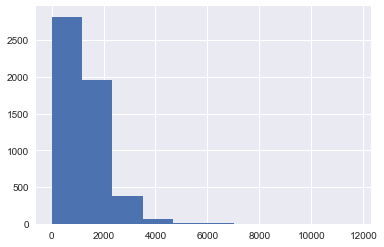

In [38]:
doc_df.length.hist()

Distribution of courses by faculty

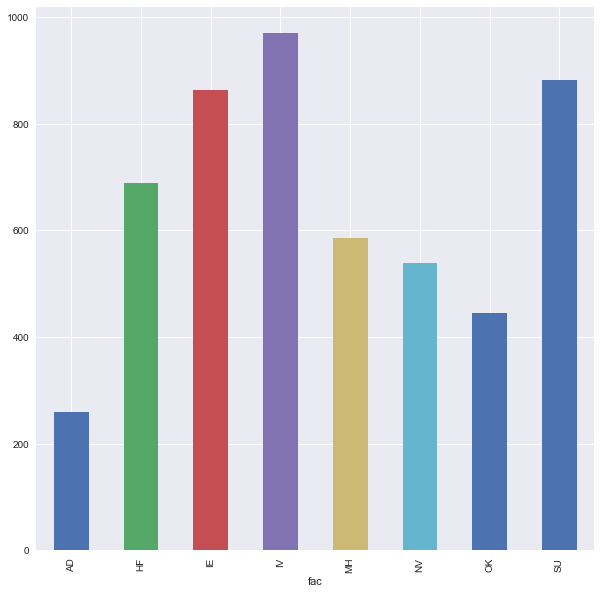

In [39]:
doc_df.groupby("fac")["fac"].agg("count").plot(kind="bar", figsize=(10,10))

Create a DataFrame from the grade-dictionary

In [40]:
max([len(v) for k, v in grades.items()])

38

In [41]:
rows = []
for k,v in grades.items():
    for rec in v:
        if (type(rec)==dict):
            rows.append(([k]+list(rec.values())))
        else:
            pass
            #print(type(rec))
            #print(rec)

In [42]:
rec

{'semester_code': 'V2018',
 'average_grade': 3.9411764705882355,
 'passed': 0,
 'a': 4,
 'b': 8,
 'c': 5,
 'd': 0,
 'e': 0,
 'f': 0}

In [43]:
doc_df.shape

(5233, 6)

In [44]:
doc_df = doc_df[doc_df.length>0]

In [45]:
doc_df.shape

(4058, 6)

In [46]:
grade_df = pd.DataFrame(rows, columns=["emne"]+list(rec.keys()))
grade_df.head(20)

,emne,semester_code,average_grade,passed,a,b,c,d,e,f
0,MA3402,H2007,4.500000,0,2,2,0,0,0,0
1,MA3402,H2008,4.400000,0,3,1,1,0,0,0
2,MA3402,H2009,4.250000,0,4,3,0,1,0,0
3,MA3402,H2010,4.250000,0,4,2,2,0,0,0
4,MA3402,H2011,4.714286,0,6,0,1,0,0,0
5,MA3402,H2012,4.750000,0,3,1,0,0,0,0
6,MA3402,H2013,4.000000,0,2,1,2,0,0,0
7,MA3402,H2014,4.250000,0,6,1,0,0,0,1
8,MA3402,H2015,3.916667,0,6,3,0,2,1,0
9,MA3402,H2016,3.900000,0,6,2,0,0,1,1


In [47]:
if SAVE:
    grade_df.to_pickle("grade_df.pkl")

In [48]:
merged = grade_df.merge(doc_df.loc[:,["emne", "fac", "inst"]], how="left", on="emne")

In [49]:
merged.head()

,emne,semester_code,average_grade,passed,a,b,c,d,e,f,fac,inst
0,MA3402,H2007,4.500000,0,2,2,0,0,0,0,IE,IE-IMF
1,MA3402,H2008,4.400000,0,3,1,1,0,0,0,IE,IE-IMF
2,MA3402,H2009,4.250000,0,4,3,0,1,0,0,IE,IE-IMF
3,MA3402,H2010,4.250000,0,4,2,2,0,0,0,IE,IE-IMF
4,MA3402,H2011,4.714286,0,6,0,1,0,0,0,IE,IE-IMF


In [50]:
merged["year"] = merged.semester_code.apply(lambda x: int(x[1:]))
merged.sample(5)

,emne,semester_code,average_grade,passed,a,b,c,d,e,f,fac,inst,year
5031,TTK4145,V2012,3.142857,0,10,28,54,12,4,4,IE,IE-ITK,2012
25515,TPG4130,V2011,3.771429,0,8,11,16,0,0,0,IV,IV-IGP,2011
29551,EXPH0004,V2014,2.210777,0,45,96,161,106,91,132,HF,HF-IFR,2014
32913,ENG3314,H2011,3.225806,0,4,6,16,3,2,0,NaN,NaN,2011
21665,SMED8015,H2014,0.000000,6,0,0,0,0,0,2,MH,MH-ISM,2014


Average grade distribution by faculty

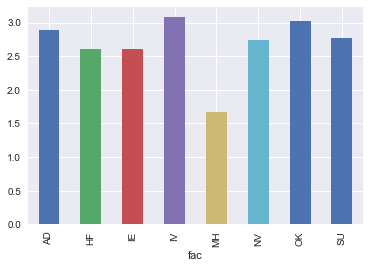

In [51]:
merged.groupby("fac")["average_grade"].agg("mean").plot(kind="bar")

Average grade development at IE

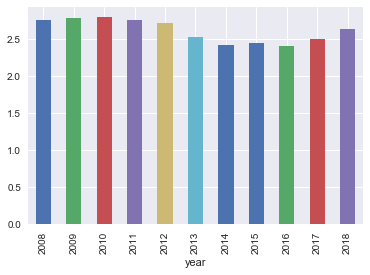

In [52]:
merged.loc[(merged.year>=2008) & (merged.fac=="IE")].groupby("year")["average_grade"].agg("mean").plot(kind="bar")

Average grade development at IDI

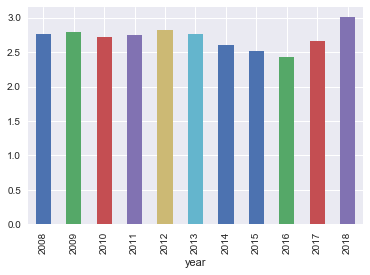

In [53]:
merged.loc[(merged.year>=2008) & (merged.inst=="IE-IDI")].groupby("year")["average_grade"].agg("mean").plot(kind="bar")

Increase in percentage since 2016

In [54]:
vals = merged.loc[(merged.year>=2008) & (merged.inst=="IE-IDI")].groupby("year")["average_grade"].agg("mean")[[2016, 2018]].values
vals

array([2.42301678, 3.00379264])

In [55]:
vals[1]/vals[0]

1.2396912255978179

In [56]:
if SAVE:
    merged.to_pickle("merged.pkl")

## Special case: Natural Language Processing (NLP)

In [57]:
doc_df.description["IT3708"]

'The main focus of the course is to build intelligent systems based on two key natural concepts: evolution by natural selection and swarm intelligence.  Such intelligent systems have thousands of useful applications in fields as diverse as control theory, telecommunications, music and art.  This course discusses both methods in great detail along with providing a bit of the biological basis for each.Lecture slides, a textbook (possibly 2).  Textbooks are chosen  at the beginning of the semester.Students will get both theoretical and practical programming experience with two of the best known sub-symbolic AI methods: evolutionary algorithms and swarm intelligence algorithms. '

In [58]:
remove_punctuation = lambda d: "".join([ (c if c not in string.punctuation+"\n\r\t" else " ") for c in d])

In [59]:
remove_punctuation(doc_df.description["IT3708"])

'The main focus of the course is to build intelligent systems based on two key natural concepts  evolution by natural selection and swarm intelligence   Such intelligent systems have thousands of useful applications in fields as diverse as control theory  telecommunications  music and art   This course discusses both methods in great detail along with providing a bit of the biological basis for each Lecture slides  a textbook  possibly 2    Textbooks are chosen  at the beginning of the semester Students will get both theoretical and practical programming experience with two of the best known sub symbolic AI methods  evolutionary algorithms and swarm intelligence algorithms  '

In [60]:
stemmer = PorterStemmer()

In [61]:
?PorterStemmer

In [62]:
tokenize = lambda d: [stemmer.stem(w.lower()) for w in remove_punctuation(d).split(" ") if len(w)>0]

In [63]:
tokenize(doc_df.description["IT3708"])

['the',
 'main',
 'focu',
 'of',
 'the',
 'cours',
 'is',
 'to',
 'build',
 'intellig',
 'system',
 'base',
 'on',
 'two',
 'key',
 'natur',
 'concept',
 'evolut',
 'by',
 'natur',
 'select',
 'and',
 'swarm',
 'intellig',
 'such',
 'intellig',
 'system',
 'have',
 'thousand',
 'of',
 'use',
 'applic',
 'in',
 'field',
 'as',
 'divers',
 'as',
 'control',
 'theori',
 'telecommun',
 'music',
 'and',
 'art',
 'thi',
 'cours',
 'discuss',
 'both',
 'method',
 'in',
 'great',
 'detail',
 'along',
 'with',
 'provid',
 'a',
 'bit',
 'of',
 'the',
 'biolog',
 'basi',
 'for',
 'each',
 'lectur',
 'slide',
 'a',
 'textbook',
 'possibl',
 '2',
 'textbook',
 'are',
 'chosen',
 'at',
 'the',
 'begin',
 'of',
 'the',
 'semest',
 'student',
 'will',
 'get',
 'both',
 'theoret',
 'and',
 'practic',
 'program',
 'experi',
 'with',
 'two',
 'of',
 'the',
 'best',
 'known',
 'sub',
 'symbol',
 'ai',
 'method',
 'evolutionari',
 'algorithm',
 'and',
 'swarm',
 'intellig',
 'algorithm']

In [64]:
doc_df.description.sample().values

array(['- The strategy concept from an historic perspective\r\n- The strategy concept - the strategic management process - strategic decision making\r\n- Corporate mission, vision, business ideas, objectives and value statements\r\n- Strategic business areas\r\n- Strategic analyses (external factors - environments, internal factors - resources) and strategic opportunities\r\n- Differentiation, choice of target groups, positioning and profiling, and portfolio analyses\r\n- Strategic evaluations and decisions\r\n- Implementation and control, including balanced scorecards\r\n- Overall corporate strategy\r\n- Business models\r\n- Illustrations/cases from different industry sectors/enterprisesMandatory:\r\n- Fjeldstad, Ø. og R. Lunnan (red.): Strategi, Fagbokforlaget (2014), ISBN: 978-82-450-1540-9\r\n- Selected articlesKnowledge:\r\n- Describe the main concepts of the field\r\n- Show some insight regarding the strategic management process\r\n- Describe strategic possibilities (generic stra

## Data science step 3: Feature Engineering

In [65]:
?TfidfVectorizer

In [66]:
if LOAD:
    stoplist = pickle.load(open("webapp/stoplist.pkl","rb"))
else:
    res = requests.get("https://www.textfixer.com/tutorials/common-english-words.txt")
    stoplist = res.text.split(",")
stoplist

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'either',
 'else',
 'ever',
 'every',
 'for',
 'from',
 'get',
 'got',
 'had',
 'has',
 'have',
 'he',
 'her',
 'hers',
 'him',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'least',
 'let',
 'like',
 'likely',
 'may',
 'me',
 'might',
 'most',
 'must',
 'my',
 'neither',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'often',
 'on',
 'only',
 'or',
 'other',
 'our',
 'own',
 'rather',
 'said',
 'say',
 'says',
 'she',
 'should',
 'since',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'this',
 'tis',
 'to',
 'too',
 'twas',
 'us',
 'wants',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'would

In [67]:
if SAVE:
    pickle.dump(stoplist, open("webapp/stoplist.pkl","wb"))

In [68]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words=stoplist)

## Data science step 4: Modelling

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

- Train/(validation)/test split 
- Stratify

In [70]:
X_train, X_test, y_train, y_test = train_test_split(doc_df.description, doc_df.fac, stratify=doc_df.fac)

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3043,), (3043,), (1015,), (1015,))

In [72]:
pd.get_dummies(y_train).head()

,AD,HF,IE,IV,MH,NV,OK,SU
TIØ4285,0,0,0,0,0,0,1,0
TBA4176,0,0,0,1,0,0,0,0
TPK4550,0,0,0,1,0,0,0,0
SOS3609,0,0,0,0,0,0,0,1
ASU10207,0,0,0,0,0,0,1,0


In [73]:
X_train = pd.concat([X_train, pd.get_dummies(y_train)], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(y_test)], axis=1)

If we want to train on full dataset

In [74]:
if not TRAIN:
    if LOAD:
        all_doc = pickle.load( open("webapp/all_doc.pkl", "rb"))
        X_all = pd.read_pickle("webapp/X_all.df")
    else:
        X_all = pd.concat([doc_df.description, pd.get_dummies(doc_df.fac)], axis=1)
        all_doc = vec.fit_transform(X_all.description.values)
        if SAVE:
            X_all.to_pickle("webapp/X_all.df")
            pickle.dump(all_doc, open("webapp/all_doc.pkl", "wb"))
    print(all_doc.shape)

In [75]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3043, 9), (3043,), (1015, 9), (1015,))

In [76]:
trn_doc = vec.fit_transform(X_train.description.values)
test_doc = vec.transform(X_test.description.values)

In [77]:
trn_doc.shape

(3043, 30337)

In [78]:
trn_doc[0]

<1x30337 sparse matrix of type '<class 'numpy.float64'>'
	with 128 stored elements in Compressed Sparse Row format>

In [79]:
vec.vocabulary_

{'thi': 27374,
 'cours': 6107,
 'give': 11509,
 'student': 25373,
 'view': 29285,
 'econom': 8547,
 'method': 16563,
 'theori': 27085,
 'coordin': 6014,
 'manag': 15819,
 'industri': 13131,
 'valu': 29055,
 'chain': 4224,
 'instrument': 13468,
 'incent': 12837,
 'consid': 5622,
 'relat': 21992,
 'corpor': 6037,
 'optim': 18293,
 'model': 16976,
 'subject': 25752,
 'suppli': 26016,
 'forecast': 10798,
 'account': 885,
 'transfer': 28024,
 'price': 20225,
 'design': 7233,
 'analysi': 1550,
 'contract': 5861,
 'agent': 1308,
 'transact': 28018,
 'cost': 6061,
 'auction': 2646,
 'announc': 1860,
 'start': 24960,
 'semest': 23587,
 'posit': 19755,
 'function': 11085,
 'mandatori': 15957,
 '8th': 492,
 'mtiøt': 17335,
 'program': 20862,
 'take': 26435,
 'manageri': 15953,
 'oper': 18220,
 'research': 22451,
 'main': 15699,
 'profil': 20846,
 'knowledg': 14315,
 'skill': 24111,
 'develop': 7466,
 'advanc': 1192,
 'focus': 10719,
 'network': 17602,
 'know': 14252,
 'explain': 9991,
 'differ': 

In [80]:
trn_doc[0].todense(), trn_doc[0].todense().shape

(matrix([[0., 0., 0., ..., 0., 0., 0.]]), (1, 30337))

In [81]:
np.where(trn_doc[0].todense())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  492,   494,   885,  1192,  1204,  1269,  1308,  1474,  1481,
         1550,  1631,  1860,  1872,  2646,  3201,  4073,  4083,  4224,
         4228,  4232,  4995,  5622,  5631,  5861,  5864,  6014,  6037,
         6061,  6107,  6170,  6221,  6257,  6336,  6341,  6941,  7233,
         7243,  7466,  7513,  7755,  7771,  8491,  8547,  8550,  8574,
         8575,  8685,  8692,  9991, 10002, 10719, 10798, 11085, 11098,
        11509, 11552, 12837, 13131, 13171, 13211, 13468, 14252, 14315,
        14428, 14632, 15699, 15730, 15819, 15825, 15876,

In [82]:
inv_voc = {v:k for k,v in vec.vocabulary_.items()}

In [83]:
X_train.description.iloc[0]

'This course will give students a view on economical methods and theory for coordinating and managing industrial value chains. Economical instruments and incentives are considered in relation to corporate  and optimization models. Subjects are: supply chain management, forecasting, management accounting (transfer prices), design and analysis of contracts, agent theory, transaction cost theory, auctions.To be announced by the start of the semester.The position and function of the course:\r\nThe course is a mandatory course in the 8th semester for students at the MTIØT program taking managerial economics and operations research (AØO) as their main profile. \r\n\r\nKnowledge and skills developed in the course:\r\nAfter taking this course the students should have advanced knowledge about economic analysis focusing on value chains and networks. They should know how to:\r\n- explain the difference between operations research models and economic models and how they supplement each other.\r\n-

In [84]:
[inv_voc[x] for x in np.where(trn_doc[0].todense())[1]]

['8th',
 '8th semest',
 'account',
 'advanc',
 'advanc knowledg',
 'affect',
 'agent',
 'analys',
 'analys challeng',
 'analysi',
 'analysi industri',
 'announc',
 'announc start',
 'auction',
 'between',
 'case',
 'case studi',
 'chain',
 'chain manag',
 'challeng',
 'compar',
 'consid',
 'consid relat',
 'contract',
 'contract type',
 'coordin',
 'corpor',
 'cost',
 'cours',
 'cours cours',
 'cours give',
 'cours mandatori',
 'cours student',
 'cours take',
 'decis',
 'design',
 'design analysi',
 'develop',
 'develop cours',
 'differ',
 'differ between',
 'each',
 'econom',
 'econom analysi',
 'econom model',
 'econom oper',
 'effect',
 'effect differ',
 'explain',
 'explain differ',
 'focus',
 'forecast',
 'function',
 'function cours',
 'give',
 'give student',
 'incent',
 'industri',
 'industri valu',
 'inform',
 'instrument',
 'know',
 'knowledg',
 'knowledg econom',
 'knowledg skill',
 'main',
 'main profil',
 'manag',
 'manag account',
 'manag industri',
 'manageri',
 'manager

In [85]:
label_cols = doc_df.fac.unique().tolist()
label_cols

['IE', 'HF', 'IV', 'AD', 'SU', 'MH', 'NV', 'OK']

In [86]:
trn_doc.shape

(3043, 30337)

In [87]:
if not TRAIN:
    trn_doc = all_doc
    X_train = X_all

In [88]:
def prior(y_i, y):
    p = trn_doc[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [89]:
def get_mdl(y):
    y = y.values
    r = np.log(prior(1,y) / prior(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = trn_doc.multiply(r)
    return m.fit(x_nb, y), r

Create empty array to store prdictions

In [90]:
preds = np.zeros((len(X_test), len(label_cols)))
preds.shape

(1015, 8)

In [91]:
X_train.head()

,description,AD,HF,IE,IV,MH,NV,OK,SU
TIØ4285,This course will give students a view on econo...,0,0,0,0,0,0,1,0
TBA4176,The module gives specialization within the fie...,0,0,0,1,0,0,0,0
TPK4550,"The course includes aspects of reliability, av...",0,0,0,1,0,0,0,0
SOS3609,The course will provide an introduction and ov...,0,0,0,0,0,0,0,1
ASU10207,"Alphabet and pronounciation\r\n\r\nGrammer, ba...",0,0,0,0,0,0,1,0


In [93]:
models = {}
rs = {}
for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(X_train[j])
    if TRAIN:
        preds[:,i] = m.predict_proba(test_doc.multiply(r))[:,1]
    else:
        if SAVE:
            np.save(open("webapp/r_"+j+".npy", "wb"), r)
            pickle.dump(m, open("webapp/"+j+"_model.pkl", "wb"))
    models[j] = m
    rs[j] = r

fit IE
fit HF
fit IV
fit AD
fit SU
fit MH
fit NV
fit OK


In [94]:
if not TRAIN:
    print("Steps below not applicable")
    raise NotImplementedError

In [95]:
df_preds = pd.DataFrame(preds, columns=label_cols)
df_preds.head()

,IE,HF,IV,AD,SU,MH,NV,OK
0,0.260684,0.012417,0.078179,0.004597,0.009830,0.007587,0.027648,0.032938
1,0.854194,0.011239,0.114517,0.006496,0.009387,0.017640,0.011475,0.011867
2,0.017097,0.998900,0.015792,0.005273,0.007959,0.007185,0.009988,0.009315
3,0.022400,0.013917,0.162375,0.005166,0.016770,0.011137,0.014742,0.760986
4,0.034577,0.240421,0.034013,0.007893,0.478959,0.008724,0.011151,0.018404


In [96]:
y_test = X_test.loc[:,label_cols]

In [97]:
for c in df_preds.columns:
    df_preds[c] = (df_preds.max(axis=1)==df_preds[c]).astype(int)

In [98]:
y_test.head()

,IE,HF,IV,AD,SU,MH,NV,OK
TK8115,1,0,0,0,0,0,0,0
TFE4152,1,0,0,0,0,0,0,0
MUSV2022,0,1,0,0,0,0,0,0
AM305918,0,0,0,0,0,0,0,1
KULT3391,0,1,0,0,0,0,0,0


In [99]:
df_preds.head()

,IE,HF,IV,AD,SU,MH,NV,OK
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0


In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
pd.DataFrame(confusion_matrix(y_test.values.argmax(axis=1), df_preds.values.argmax(axis=1)), index=label_cols, columns=label_cols)

,IE,HF,IV,AD,SU,MH,NV,OK
IE,128,1,8,0,1,0,4,13
HF,0,163,1,0,3,0,0,0
IV,9,0,204,1,0,0,6,9
AD,3,2,6,41,3,0,0,2
SU,0,3,3,0,114,0,1,5
MH,1,1,0,0,5,64,5,3
NV,7,0,7,0,0,1,88,3
OK,1,2,7,0,4,0,0,82


Accuracy:

In [102]:
(y_test.values.argmax(axis=1)==df_preds.values.argmax(axis=1)).sum()/len(y_test)

0.870935960591133

Accuracy not the most "fair" metric in multi-class classification problems

In [103]:
comp = pd.DataFrame(np.concatenate([y_test.values, df_preds.values], axis=1))
comp.columns = label_cols+[x+"_pred" for x in label_cols]
comp.head()

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,IV_pred,AD_pred,SU_pred,MH_pred,NV_pred,OK_pred
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
comp[comp.IE!=comp.IE_pred]

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,IV_pred,AD_pred,SU_pred,MH_pred,NV_pred,OK_pred
14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
69,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
70,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
72,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
125,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
149,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [114]:
wrong_df = pd.DataFrame(preds[comp.IE!=comp.IE_pred], index=comp[comp.IE!=comp.IE_pred].index, columns=[c+"_prob" for c in label_cols])
wrong_df

,IE_prob,HF_prob,IV_prob,AD_prob,SU_prob,MH_prob,NV_prob,OK_prob
14,0.081503,0.027784,0.058697,0.067598,0.020782,0.043893,0.100721,0.168048
69,0.303411,0.011921,0.359620,0.004660,0.015457,0.010194,0.008768,0.060642
70,0.899551,0.005859,0.790870,0.008055,0.007017,0.007497,0.029542,0.008648
72,0.247674,0.012640,0.134689,0.013503,0.015125,0.006956,0.028386,0.012615
83,0.081503,0.027784,0.058697,0.067598,0.020782,0.043893,0.100721,0.168048
106,0.080418,0.008106,0.312205,0.006473,0.015677,0.008104,0.009770,0.323944
125,0.562930,0.021411,0.053357,0.373581,0.012248,0.006437,0.011022,0.017230
149,0.081503,0.027784,0.058697,0.067598,0.020782,0.043893,0.100721,0.168048
193,0.081503,0.027784,0.058697,0.067598,0.020782,0.043893,0.100721,0.168048
198,0.332275,0.024315,0.154047,0.008601,0.015020,0.019395,0.510200,0.012280


In [115]:
pd.concat([comp[comp.IE!=comp.IE_pred], wrong_df], axis=1)

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,...,NV_pred,OK_pred,IE_prob,HF_prob,IV_prob,AD_prob,SU_prob,MH_prob,NV_prob,OK_prob
14,1,0,0,0,0,0,0,0,0,0,...,0,1,0.081503,0.027784,0.058697,0.067598,0.020782,0.043893,0.100721,0.168048
69,1,0,0,0,0,0,0,0,0,0,...,0,0,0.303411,0.011921,0.359620,0.004660,0.015457,0.010194,0.008768,0.060642
70,0,0,1,0,0,0,0,0,1,0,...,0,0,0.899551,0.005859,0.790870,0.008055,0.007017,0.007497,0.029542,0.008648
72,0,0,1,0,0,0,0,0,1,0,...,0,0,0.247674,0.012640,0.134689,0.013503,0.015125,0.006956,0.028386,0.012615
83,1,0,0,0,0,0,0,0,0,0,...,0,1,0.081503,0.027784,0.058697,0.067598,0.020782,0.043893,0.100721,0.168048
106,1,0,0,0,0,0,0,0,0,0,...,0,1,0.080418,0.008106,0.312205,0.006473,0.015677,0.008104,0.009770,0.323944
125,0,0,0,1,0,0,0,0,1,0,...,0,0,0.562930,0.021411,0.053357,0.373581,0.012248,0.006437,0.011022,0.017230
149,1,0,0,0,0,0,0,0,0,0,...,0,1,0.081503,0.027784,0.058697,0.067598,0.020782,0.043893,0.100721,0.168048
193,1,0,0,0,0,0,0,0,0,0,...,0,1,0.081503,0.027784,0.058697,0.067598,0.020782,0.043893,0.100721,0.168048
198,1,0,0,0,0,0,0,0,0,0,...,1,0,0.332275,0.024315,0.154047,0.008601,0.015020,0.019395,0.510200,0.012280


Choose a random sample where prediction was wrong

In [156]:
doc_df.rename(columns={"emne":"course"}).to_csv("course_descriptions.csv")

In [157]:
grade_df.rename(columns={"emne":"course"}).to_csv("grades.csv")

In [144]:
def get_wrong_ie():
    ind = random.choice(wrong_df.index.values)
    print("Randomly selected sample with index {}".format(ind))
    print("Description: \n")
    print(X_test.description.iloc[ind])
    print("\nPredictions:")
    print(wrong_df.loc[ind])
    print("\nTrue:")
    print(X_test.index.values[ind])
    print("\n")
    print(comp.loc[ind,label_cols]) #.iloc[ind])

In [145]:
get_wrong_ie()

Randomly selected sample with index 70
Description: 

The main objective of the course is to give the students an introduction to electrical engineering and an understanding of marine electric power systems on ships and offshore platforms, which is of importance for engineering, design, scientific analysis, and management of the marine systems. 

The course starts with an introduction to analysis of electrical and electric power systems, with focus on electro-technical concepts, electric circuit laws, and characteristics of electric systems, such as circuit analysis, electric power systems, 1-phase and 3-phase systems, phasor diagrams, electromagnetic energy conversion, and principles of power electronics and electric machinery. 

The course continues with a study of electric machines, power electronics systems and propulsion drives, electric power generation and distribution, power management systems (PMS) and energy management systems (EMS), operational issues, and class rules and me

In [ ]:
def get_confident():
    

In [146]:
def classify(text):
    preds = {}
    test_doc = vec.transform([text])
    for label, m in models.items():
        init_preds = m.predict_proba(test_doc.multiply(rs[label]))[:,1]
        preds[label] = init_preds[0]
    return preds

In [147]:
classify('Machine learning algorithms are complex computer systems and artificial intelligence is really cool')

{'IE': 0.9594377220144029,
 'HF': 0.008799975431426937,
 'IV': 0.04001696560758246,
 'AD': 0.005753514229144281,
 'SU': 0.008134947281419098,
 'MH': 0.006153485158215045,
 'NV': 0.010484590534428608,
 'OK': 0.013249611415211278}

In [148]:
classify('Neurologial biological human medicine interaction patients prosthesis')

{'IE': 0.015627395469587975,
 'HF': 0.01022638262839432,
 'IV': 0.014630058043255581,
 'AD': 0.007265306650394517,
 'SU': 0.01008515679667333,
 'MH': 0.984066689333455,
 'NV': 0.3010594893154869,
 'OK': 0.013263551006334893}